In [89]:
# run from suite2p environment!!
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.io as sio
import sys
sys.path.append('./helpers')
import loadmat as lm
from sklearn import linear_model
from scipy import signal
from sklearn.model_selection import cross_val_score, cross_validate
import os
from sklearn.metrics import make_scorer, confusion_matrix
import glob
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from helpers import preprocess

In [91]:
import scipy as sp

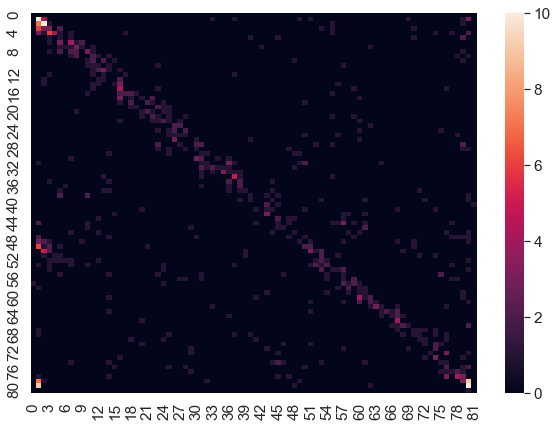

In [68]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
     
df_cm = pd.DataFrame((conf_matrix), range(82),
                  range(82))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=False,annot_kws={"size": 3},vmax=10)# font size
plt.savefig('C:/temp/out_error_cm1.png')

In [182]:
files = glob.glob('Z:/giocomo/attialex/NP_DATA/classifier_output/*conf*')
files


['Z:/giocomo/attialex/NP_DATA/classifier_output\\npG2_1213_gain_1_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npG4_1203_gain_2_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npH3_0401_gain_1_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npH3_0403_gain_1_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npH5_0325_gain_1_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npH5_0327_gain_1_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npI5_0418_gain_1_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npJ1_0524_gain_2_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npJ1_0524_gain_combined_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npJ2_0513_gain_1_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npJ2_0513_gain_2_confMatrix.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\npJ3_0505_gain_1_confMatrix.npy

In [377]:
files = glob.glob('Z:/giocomo/attialex/NP_DATA/classifier_output/RSP*conf*')
allMat = [np.array([]) for i in range(5)]

for iF in files:
    data=np.load(iF)
    for i in range(5):
        if not np.isnan(data[i]).all():
            tmp = data[i][0:80,0:80]
            tmp = tmp/tmp.sum()
            tmp = tmp/tmp.max()
            allMat[i]=np.dstack([allMat[i],tmp]) if allMat[i].size else tmp
        
    

In [378]:
data.shape

(5, 81, 81)

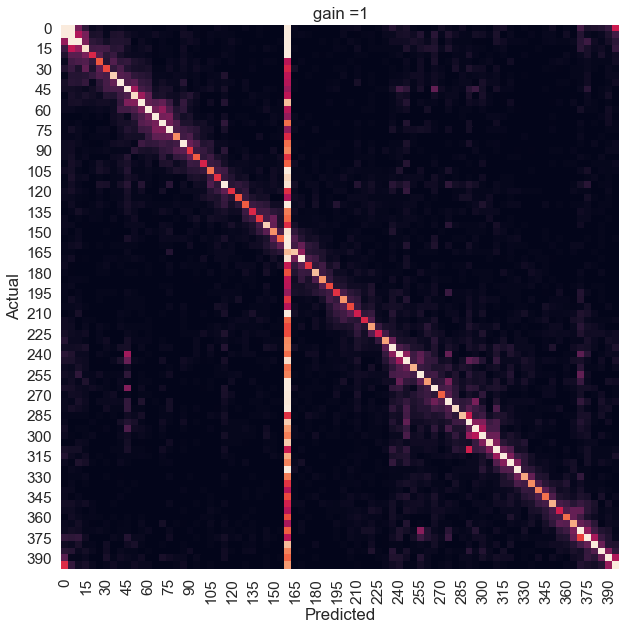

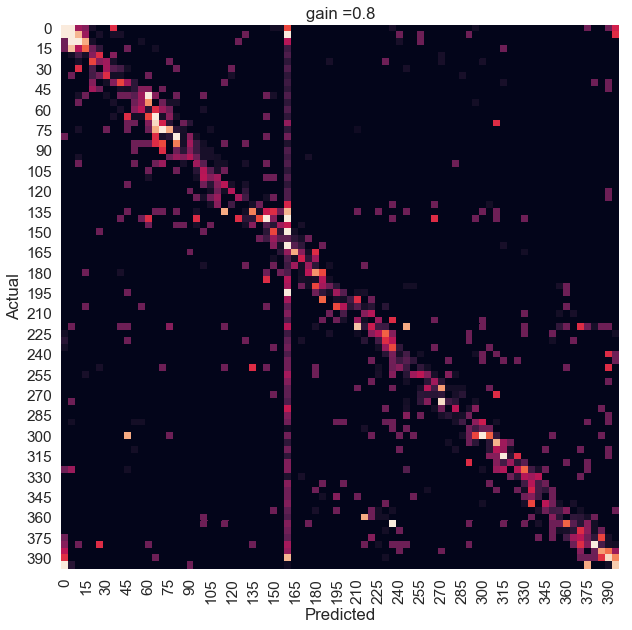

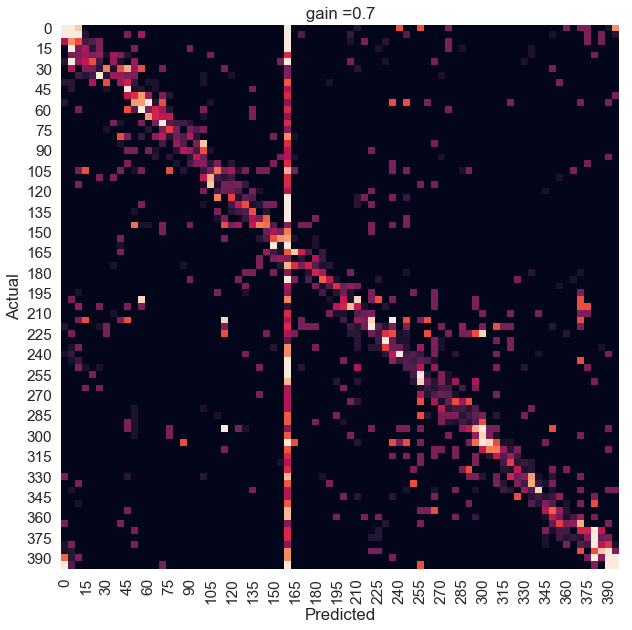

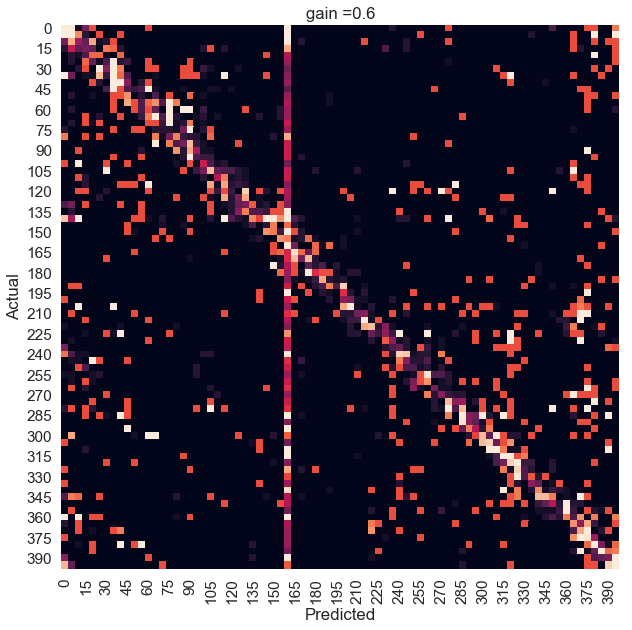

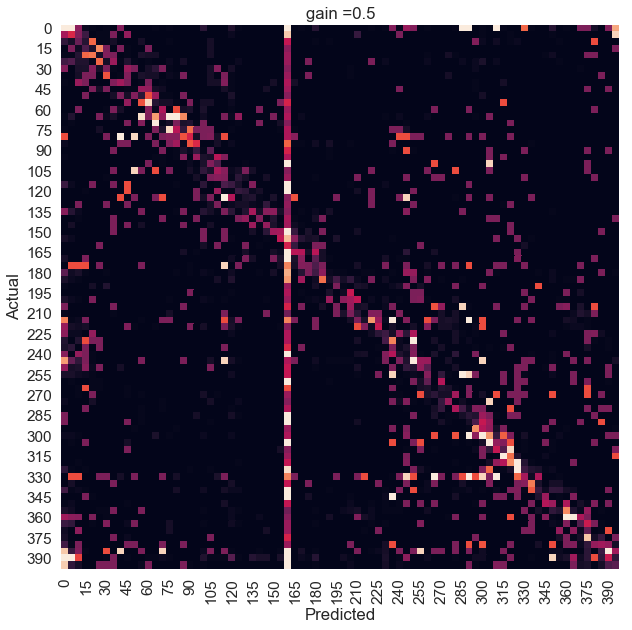

In [379]:
gains = [1,0.8,0.7,0.6,0.5]
for num,cMat in enumerate(allMat):
    df_cm = pd.DataFrame(cMat.mean(axis=2), np.arange(cMat.shape[0])*5,np.arange(cMat.shape[1])*5)
    plt.figure(figsize = (10,10))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=False,annot_kws={"size": 3},vmax=0.1,cbar=None)# font size
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('gain ={}'.format(gains[num]))
    plt.savefig('C:/temp/out_error_cm'+ str(gains[num]) +'.png')

In [316]:
aa=allMat[4]
aa.shape


(80, 80, 29)

In [394]:
files = glob.glob('Z:/giocomo/attialex/NP_DATA/classifier_output/RHP*scores*')

errorMat = np.array([])

for num,iF in enumerate(files):
    data=np.load(iF)
    errorMat=np.dstack([errorMat,data]) if errorMat.size else data


In [395]:
files

['Z:/giocomo/attialex/NP_DATA/classifier_output\\RHP_AA1_190726_gain_1_scores.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\RHP_AA1_190729_gain_1_scores.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\RHP_AA3_190801_gain_3_scores.npy',
 'Z:/giocomo/attialex/NP_DATA/classifier_output\\RHP_AA4_190801_gain_1_scores.npy']

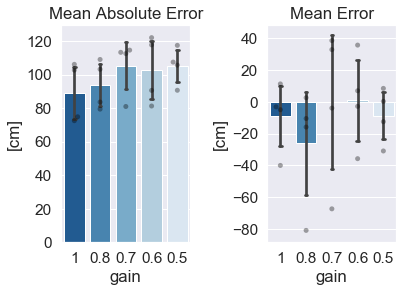

In [396]:
f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 0.6)
titles=['Mean Absolute Error','Mean Error','Precision']
for num in range(2):
    bb={str(e):errorMat[num,iC,:]*5 for iC,e in enumerate([1, 0.8, 0.7, 0.6, 0.5])}
    #bb['100']=bl_scores
    bb=pd.DataFrame(bb)
    sns.barplot(data=bb, capsize=.1, ci="sd",palette="Blues_r",ax=axes[num])
    ax=sns.swarmplot(data=bb, color="0", alpha=.35,ax=axes[num])
    axes[num].set_xlabel('gain')
    axes[num].set_ylabel('[cm]')
    axes[num].set_title(titles[num])

In [391]:
files = glob.glob('Z:/giocomo/attialex/NP_DATA/classifier_output/AA*conf*')
allMat = [np.array([]) for i in range(5)]

for iF in files:
    data=np.load(iF)
    for i in range(5):
        if not np.isnan(data[i]).all():
            tmp = data[i][0:80,0:80]
            allMat[i]=np.dstack([allMat[i],tmp]) if allMat[i].size else tmp

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


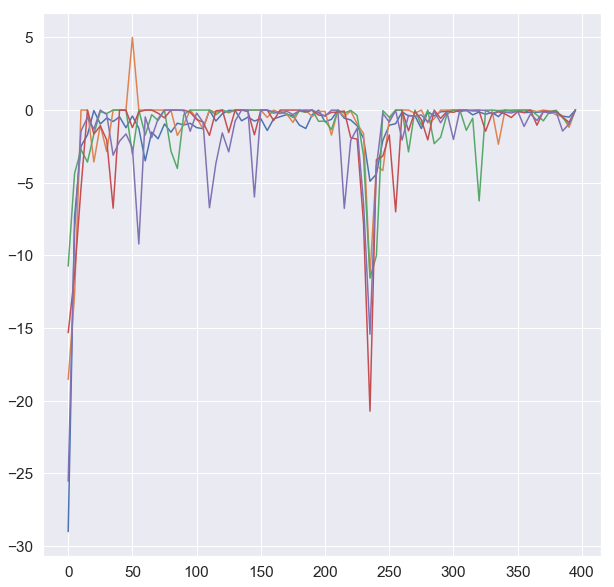

In [392]:
gains = [1,0.8,0.7,0.6,0.5]
plt.figure(figsize = (10,10))

for num,gain in enumerate(gains):
    error = np.zeros([allMat[num].shape[2],80])
    for iS in range(allMat[num].shape[2]):
        pp=allMat[num][:,:,iS]
        for actual in range(80):
            for predicted in range(80):
                error[iS,actual]=error[iS,actual]+(actual-predicted)*pp[actual,predicted]
                error[iS,actual]=error[iS,actual]/np.sum(pp[actual,:])
    plt.plot(np.arange(80)*5,error.mean(axis=0)*5)


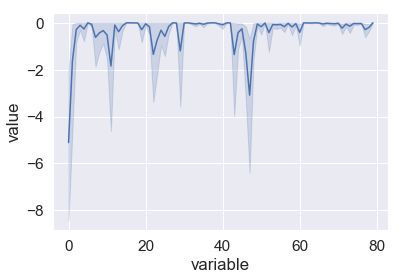

In [393]:
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
data.shape
df = pd.DataFrame(error).melt()
sns.lineplot(x="variable", y="value", data=df)

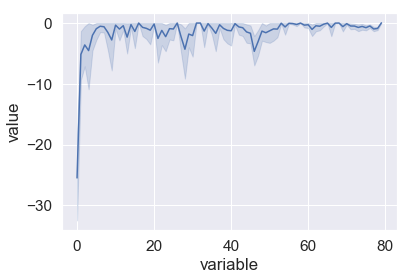

In [355]:
sns.lineplot(x="variable", y="value",data=pd.DataFrame(error*5).melt())